In [16]:
from sklearn import preprocessing
from sklearn import model_selection

import evopipe
import steps
import warnings

from sklearn.model_selection import train_test_split
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
digits = datasets.load_digits()
train_X, test_X, train_Y, test_Y = train_test_split(digits.data, digits.target, test_size = 0.25, random_state = 0)

params = steps.get_params(len(train_X[0]))

In [18]:
print("Format:")
print("------------")
print("Classifier")
print("score")
print("cross-validation score")
print("GridSearch score")
print("------------")
print()

with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    for name, cls in steps.clfs.items():
        classif = cls()
        print(classif.__class__.__name__)
        classif.fit(train_X, train_Y)
        print(classif.score(test_X, test_Y))
        print(model_selection.cross_val_score(classif, test_X, test_Y).mean())
        
        pipe_params = params[name]
        gs = model_selection.GridSearchCV(classif, pipe_params, n_jobs=-1, verbose=5)
        gs.fit(train_X, train_Y)
        
        print(gs.best_params_)
        print(gs.score(test_X, test_Y))
        print()

Format:
------------
Classifier
score
cross-validation score
GridSearch score
------------

SVC
0.4866666666666667
0.15292961629096083
Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:   37.1s finished


{'C': 2, 'gamma': 0.001, 'tol': 0.0001}
0.9933333333333333

LogisticRegression
0.9533333333333334
0.942071939887066
Fitting 3 folds for each of 21 candidates, totalling 63 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  63 out of  63 | elapsed:   18.8s finished


{'C': 15, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.01}
0.96

Perceptron
0.8977777777777778
0.873704148325997
Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    7.1s finished


{'alpha': 0.001, 'n_iter': 10, 'penalty': 'l1'}
0.94

SGDClassifier
0.9444444444444444
0.8507145080254324
Fitting 3 folds for each of 69120 candidates, totalling 207360 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 736 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 1319 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 2163 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3012 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4021 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 5194 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 6398 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 7477 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 8913 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 10418 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 12177 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 14054 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 16310 tasks      | elapsed: 

{'alpha': 0.0001, 'epsilon': 0.05, 'eta0': 0.1, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'squared_hinge', 'n_iter': 5, 'penalty': 'l1', 'power_t': 1}
0.94

PassiveAggressiveClassifier
0.9444444444444444
0.9221991018629674
Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    2.5s finished


{'C': 2, 'loss': 'hinge'}
0.9533333333333334

LinearDiscriminantAnalysis
0.9511111111111111
0.9133991374327509
Fitting 3 folds for each of 10 candidates, totalling 30 fits


JoblibLinAlgError: JoblibLinAlgError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
C:\Anaconda\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
C:\Anaconda\lib\runpy.py in _run_code(code=<code object <module> at 0x000002110F96E8A0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Anaconda\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x000002110F96E8A0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'C:\Anaconda\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\Anaconda\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...onda\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'C:\\Anaconda\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\Anaconda\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\Anaconda\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
C:\Anaconda\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
C:\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
C:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
C:\Anaconda\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
C:\Anaconda\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 21, 6, 34, 54, 630803, tzinfo=tzutc()), 'msg_id': 'ba2fbc03a272c57668e4edb7ccf08822', 'msg_type': 'execute_request', 'session': '75931525be3d49523fada458a979d431', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ba2fbc03a272c57668e4edb7ccf08822', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'75931525be3d49523fada458a979d431']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 21, 6, 34, 54, 630803, tzinfo=tzutc()), 'msg_id': 'ba2fbc03a272c57668e4edb7ccf08822', 'msg_type': 'execute_request', 'session': '75931525be3d49523fada458a979d431', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ba2fbc03a272c57668e4edb7ccf08822', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'75931525be3d49523fada458a979d431'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 9, 21, 6, 34, 54, 630803, tzinfo=tzutc()), 'msg_id': 'ba2fbc03a272c57668e4edb7ccf08822', 'msg_type': 'execute_request', 'session': '75931525be3d49523fada458a979d431', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'ba2fbc03a272c57668e4edb7ccf08822', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\Anaconda\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.Expr object>, <_ast.With object>], cell_name='<ipython-input-18-3cb680609c6e>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 211152c7fd0, executio..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000002111756E780, file "<ipython-input-18-3cb680609c6e>", line 10>
        result = <ExecutionResult object at 211152c7fd0, executio..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000002111756E780, file "<ipython-input-18-3cb680609c6e>", line 10>, result=<ExecutionResult object at 211152c7fd0, executio..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000002111756E780, file "<ipython-input-18-3cb680609c6e>", line 10>
        self.user_global_ns = {'In': ['', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,...igits.target, test_size = 0.25, random_state = 0)', 'clf = evopipe.EvoPipeClassifier(steps.preproc, s...e: {}, Pipe: {}".format(score, pipe_named_steps))', 'print(clf.logbook)\n\ngen = clf.logbook.select("ge...t(gen, avgs_tt, label=\'Average test\')\n\nplt.show()', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,...igits.target, test_size = 0.25, random_state = 0)', 'clf = evopipe.EvoPipeClassifier(steps.preproc, s...e: {}, Pipe: {}".format(score, pipe_named_steps))', 'print(clf.logbook)\n\ngen = clf.logbook.select("ge...t(gen, avgs_tt, label=\'Average test\')\n\nplt.show()', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,...igits.target, test_size = 0.25, random_state = 0)', 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,... = 0)\n\nparams = steps.get_params(len(train_X[0]))', 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,... = 0)\n\nparams = steps.get_params(len(train_X[0]))', 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()'], 'Out': {}, '_': '', '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '__doc__': 'Automatically created module for IPython interactive environment', '__loader__': None, '__name__': '__main__', ...}
        self.user_ns = {'In': ['', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,...igits.target, test_size = 0.25, random_state = 0)', 'clf = evopipe.EvoPipeClassifier(steps.preproc, s...e: {}, Pipe: {}".format(score, pipe_named_steps))', 'print(clf.logbook)\n\ngen = clf.logbook.select("ge...t(gen, avgs_tt, label=\'Average test\')\n\nplt.show()', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,...igits.target, test_size = 0.25, random_state = 0)', 'clf = evopipe.EvoPipeClassifier(steps.preproc, s...e: {}, Pipe: {}".format(score, pipe_named_steps))', 'print(clf.logbook)\n\ngen = clf.logbook.select("ge...t(gen, avgs_tt, label=\'Average test\')\n\nplt.show()', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,...igits.target, test_size = 0.25, random_state = 0)', 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,... = 0)\n\nparams = steps.get_params(len(train_X[0]))', 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()', 'from sklearn import preprocessing\nfrom sklearn i...rt matplotlib.pyplot as plt\nimport seaborn as sns', 'digits = datasets.load_digits()\ntrain_X, test_X,... = 0)\n\nparams = steps.get_params(len(train_X[0]))', 'print("Format:")\nprint("------------")\nprint("Cl...  print(gs.score(test_X, test_Y))\n        print()'], 'Out': {}, '_': '', '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, '__doc__': 'Automatically created module for IPython interactive environment', '__loader__': None, '__name__': '__main__', ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
G:\Code\Python\evo-pipe\<ipython-input-18-3cb680609c6e> in <module>()
     16         print(classif.score(test_X, test_Y))
     17         print(model_selection.cross_val_score(classif, test_X, test_Y).mean())
     18         
     19         pipe_params = params[name]
     20         gs = model_selection.GridSearchCV(classif, pipe_params, n_jobs=-1, verbose=5)
---> 21         gs.fit(train_X, train_Y)
     22         
     23         print(gs.best_params_)
     24         print(gs.score(test_X, test_Y))
     25         print()

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...ain_score='warn',
       scoring=None, verbose=5), X=array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]]), y=array([2, 8, 9, ..., 7, 7, 8]), groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X = array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])
        y = array([2, 8, 9, ..., 7, 7, 8])
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
LinAlgError                                        Fri Sep 21 11:01:19 2018
PID: 14636                             Python 3.6.4: C:\Anaconda\python.exe
...........................................................................
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (LinearDiscriminantAnalysis(n_components=None, pr...lver='eigen', store_covariance=False, tol=0.0001), array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]]), array([2, 8, 9, ..., 7, 7, 8]), {'score': <function _passthrough_scorer>}, array([ 322,  329,  350,  351,  353,  361,  367,...1340, 1341, 1342,
       1343, 1344, 1345, 1346]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...01, 514, 528, 541, 544, 556, 557, 563, 575, 589]), 5, {'shrinkage': None, 'solver': 'eigen'}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LinearDiscriminantAnalysis(n_components=None, pr...lver='eigen', store_covariance=False, tol=0.0001), array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]]), array([2, 8, 9, ..., 7, 7, 8]), {'score': <function _passthrough_scorer>}, array([ 322,  329,  350,  351,  353,  361,  367,...1340, 1341, 1342,
       1343, 1344, 1345, 1346]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...01, 514, 528, 541, 544, 556, 557, 563, 575, 589]), 5, {'shrinkage': None, 'solver': 'eigen'})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=LinearDiscriminantAnalysis(n_components=None, pr...lver='eigen', store_covariance=False, tol=0.0001), X=array([[ 0.,  3., 13., ..., 12.,  9.,  1.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]]), y=array([2, 8, 9, ..., 7, 7, 8]), scorer={'score': <function _passthrough_scorer>}, train=array([ 322,  329,  350,  351,  353,  361,  367,...1340, 1341, 1342,
       1343, 1344, 1345, 1346]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...01, 514, 528, 541, 544, 556, 557, 563, 575, 589]), verbose=5, parameters={'shrinkage': None, 'solver': 'eigen'}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method LinearDiscriminantAnalysis.fit of ...ver='eigen', store_covariance=False, tol=0.0001)>
        X_train = array([[ 0.,  0.,  9., ...,  7.,  0.,  0.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])
        y_train = array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0,...    7, 6, 3, 4, 1, 1, 4, 8, 4, 5, 3, 3, 7, 7, 8])
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py in fit(self=LinearDiscriminantAnalysis(n_components=None, pr...lver='eigen', store_covariance=False, tol=0.0001), X=array([[ 0.,  0.,  9., ...,  7.,  0.,  0.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]]), y=array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0,...    7, 6, 3, 4, 1, 1, 4, 8, 4, 5, 3, 3, 7, 7, 8]))
    454                 raise NotImplementedError('shrinkage not supported')
    455             self._solve_svd(X, y)
    456         elif self.solver == 'lsqr':
    457             self._solve_lsqr(X, y, shrinkage=self.shrinkage)
    458         elif self.solver == 'eigen':
--> 459             self._solve_eigen(X, y, shrinkage=self.shrinkage)
        self._solve_eigen = <bound method LinearDiscriminantAnalysis._solve_...ver='eigen', store_covariance=False, tol=0.0001)>
        X = array([[ 0.,  0.,  9., ...,  7.,  0.,  0.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]])
        y = array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0,...    7, 6, 3, 4, 1, 1, 4, 8, 4, 5, 3, 3, 7, 7, 8])
        self.shrinkage = None
    460         else:
    461             raise ValueError("unknown solver {} (valid solvers are 'svd', "
    462                              "'lsqr', and 'eigen').".format(self.solver))
    463         if self.classes_.size == 2:  # treat binary case as a special case

...........................................................................
C:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py in _solve_eigen(self=LinearDiscriminantAnalysis(n_components=None, pr...lver='eigen', store_covariance=False, tol=0.0001), X=array([[ 0.,  0.,  9., ...,  7.,  0.,  0.],
    ...0.],
       [ 0.,  0.,  6., ..., 11.,  0.,  0.]]), y=array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0,...    7, 6, 3, 4, 1, 1, 4, 8, 4, 5, 3, 3, 7, 7, 8]), shrinkage=None)
    332 
    333         Sw = self.covariance_  # within scatter
    334         St = _cov(X, shrinkage)  # total scatter
    335         Sb = St - Sw  # between scatter
    336 
--> 337         evals, evecs = linalg.eigh(Sb, Sw)
        evals = undefined
        evecs = undefined
        Sb = array([[ 0.        ,  0.        ,  0.        , ....  1.17818081,
         1.07769225,  0.34865256]])
        Sw = array([[ 0.        ,  0.        ,  0.        , ....  1.47592986,
         3.1337456 ,  2.64521904]])
    338         self.explained_variance_ratio_ = np.sort(evals / np.sum(evals)
    339                                                  )[::-1][:self._max_components]
    340         evecs = evecs[:, np.argsort(evals)[::-1]]  # sort eigenvectors
    341         evecs /= np.linalg.norm(evecs, axis=0)

...........................................................................
C:\Anaconda\lib\site-packages\scipy\linalg\decomp.py in eigh(a=array([[ 0.        ,  0.        ,  0.        , ....  1.17818081,
         1.07769225,  0.34865256]]), b=array([[ 0.        ,  0.        ,  0.        , ....  1.47592986,
         3.1337456 ,  2.64521904]]), lower=True, eigvals_only=False, overwrite_a=False, overwrite_b=False, turbo=True, eigvals=None, type=1, check_finite=True)
    443     else:
    444         raise LinAlgError("the leading minor of order %i"
    445                           " of 'b' is not positive definite. The"
    446                           " factorization of 'b' could not be completed"
    447                           " and no eigenvalues or eigenvectors were"
--> 448                           " computed." % (info-b1.shape[0]))
        info = 65
        b1.shape = (64, 64)
    449 
    450 
    451 _conv_dict = {0: 0, 1: 1, 2: 2,
    452               'all': 0, 'value': 1, 'index': 2,

LinAlgError: the leading minor of order 1 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.
___________________________________________________________________________

In [19]:
clf = evopipe.EvoPipeClassifier(steps.preproc, steps.clfs, params)
clf.fit(train_X, train_Y, test_X, test_Y)

score = clf.score(test_X, test_Y)
print("\nBest pipeline test score: {}\n".format(score))

best_pipes = clf.best_pipelines()

for pipe in best_pipes:
    pipe.fit(train_X, train_Y)
    score = pipe.score(test_X, test_Y)
    
    pipe_named_steps = []
    for key, val in pipe.steps:
        pipe_named_steps.append(key)       
    print("Score: {}, Pipe: {}".format(score, pipe_named_steps))

C:\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'PipeFitness' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Anaconda\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)



Gen 6:

Hall of fame:
[('MLP', {'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.01, 'learning_rate': 'invscaling', 'tol': 0.0001, 'max_iter': 200, 'learning_rate_init': 0.01, 'power_t': 2, 'momentum': 0.1, 'hidden_layer_sizes': (20,)})]
[('kBest', {'k': 64}), ('PAC', {'loss': 'squared_hinge', 'C': 0.5})]
[('SGD', {'penalty': 'elasticnet', 'loss': 'hinge', 'n_iter': 5, 'alpha': 0.0001, 'l1_ratio': 0.5, 'epsilon': 0.5, 'learning_rate': 'optimal', 'eta0': 0.01, 'power_t': 0.5})]
[('PAC', {'loss': 'squared_hinge', 'C': 0.5})]
[('kBest', {'k': 64}), ('SGD', {'penalty': 'elasticnet', 'loss': 'hinge', 'n_iter': 5, 'alpha': 0.0001, 'l1_ratio': 0.5, 'epsilon': 0.5, 'learning_rate': 'optimal', 'eta0': 0.01, 'power_t': 0.5})]

Gen 11:

Hall of fame:
[('MLP', {'activation': 'relu', 'solver': 'lbfgs', 'alpha': 0.01, 'learning_rate': 'invscaling', 'tol': 0.0001, 'max_iter': 200, 'learning_rate_init': 0.01, 'power_t': 2, 'momentum': 0.1, 'hidden_layer_sizes': (20,)})]
[('kBest', {'k': 64}), ('PA

C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)



Best pipeline test score: 0.9466666666666667



C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Score: 0.9444444444444444, Pipe: ['sgdclassifier']


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Score: 0.9422222222222222, Pipe: ['sgdclassifier']
Score: 0.9622222222222222, Pipe: ['mlpclassifier']


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Score: 0.9444444444444444, Pipe: ['sgdclassifier']
Score: 0.9488888888888889, Pipe: ['passiveaggressiveclassifier']


C:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


   	                    fitness                     	                   train_test                   
   	------------------------------------------------	------------------------------------------------
gen	gen	avg     	min     	max     	gen	avg     	min     	max     
0  	   	0.178628	0       	0.959231	   	0.176148	0       	0.96    
1  	   	0.378838	0       	0.959231	   	0.372741	0       	0.96    
2  	   	0.695521	0       	0.959231	   	0.673778	0       	0.96    
3  	   	0.860574	0       	0.959231	   	0.845185	0       	0.96    
4  	   	0.939956	0.859638	0.959231	   	0.943259	0.835556	0.96    
5  	   	0.947567	0.933201	0.949693	   	0.945111	0.915556	0.955556
6  	   	0.948487	0.947997	0.951137	   	0.944148	0.937778	0.951111
7  	   	0.948529	0.942866	0.951137	   	0.942667	0.937778	0.951111
8  	   	0.948512	0.943552	0.951137	   	0.941481	0.937778	0.951111
9  	   	0.947997	0.940753	0.951137	   	0.938963	0.924444	0.951111
10 	   	0.948766	0.940753	0.951137	   	0.940593	0.924444	0.951111
11 	

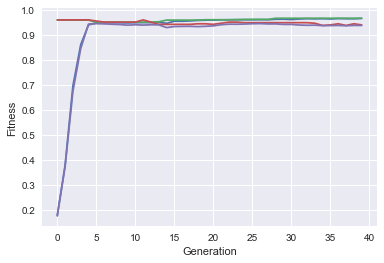

In [20]:
print(clf.logbook)

gen = clf.logbook.select("gen")
avgs, mins, maxs, vars = clf.logbook.chapters["fitness"].select("avg", "min", "max", "var")
avgs_tt, mins_tt, maxs_tt, vars_tt = clf.logbook.chapters["train_test"].select("avg", "min", "max", "var")

sns.set()

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(gen, avgs, label='Average')
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness")

ax1.plot(gen, maxs, label='Maximum')

ax1.plot(gen, maxs_tt, label='Maximum test')
ax1.plot(gen, avgs_tt, label='Average test')

plt.show()